# 파이썬 데이터 분석

-----

# 전세계 음주 데이터 분석하기

# <Step1. 탐색> 데이터의 기초 정보 살펴보기

### [drinks 데이터셋의 기본 정보]

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = './data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


-----

# <Step2. 인사이트의 발견> : 탐색과 시각화

### [피처간의 상관관계 탐색]

##### [두 피처간의 상관계수 구하기]

- 여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하는 연습을 해봅니다.

In [ ]:
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수를 계산합니다.
# pearson은 상관계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법입니다.




               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [4]:
drinks[['beer_servings','spirit_servings','total_litres_of_pure_alcohol']].corr(method='pearson')

,beer_servings,spirit_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.835839
spirit_servings,0.458819,1.000000,0.654968
total_litres_of_pure_alcohol,0.835839,0.654968,1.000000


-----

##### [여러 피처의 상관관계 분석]

In [ ]:
# 피처간의 상관계수 행렬을 구합니다.




                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


-----

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install seaborn`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [12]:
# !pip install seaborn

-----

In [11]:
drinks = drinks.iloc[:, 1:]
drinks

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,0,0,0.0,AS
1,89,132,54,4.9,EU
2,25,0,14,0.7,AF
3,245,138,312,12.4,EU
4,217,57,45,5.9,AF
...,...,...,...,...,...
188,333,100,3,7.7,SA
189,111,2,1,2.0,AS
190,6,0,0,0.1,AS
191,32,19,4,2.5,AF


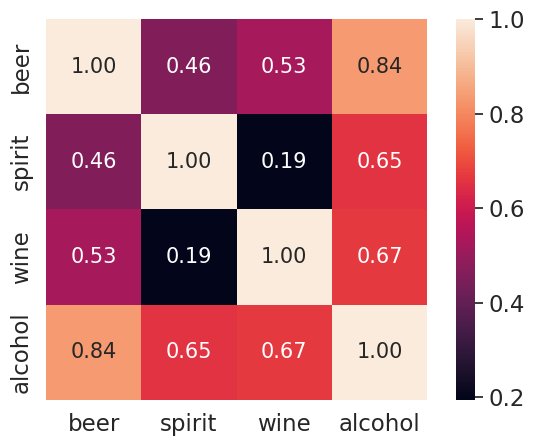

In [ ]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)



plt.tight_layout()
plt.show()



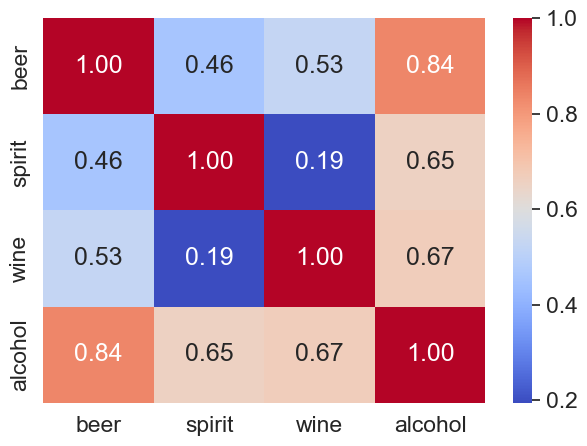

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 컬럼만 따로 가져옴
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
drinks_corr = drinks[cols].corr()

# 축 이름 축약 (표시만 바꾸는 용도)
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

# 시본 히트맵 그리기
sns.set(font_scale=1.5)
hm = sns.heatmap(drinks_corr, annot=True, cmap='coolwarm', fmt='.2f',
                 yticklabels=cols_view, xticklabels=cols_view)

plt.tight_layout()
plt.show()

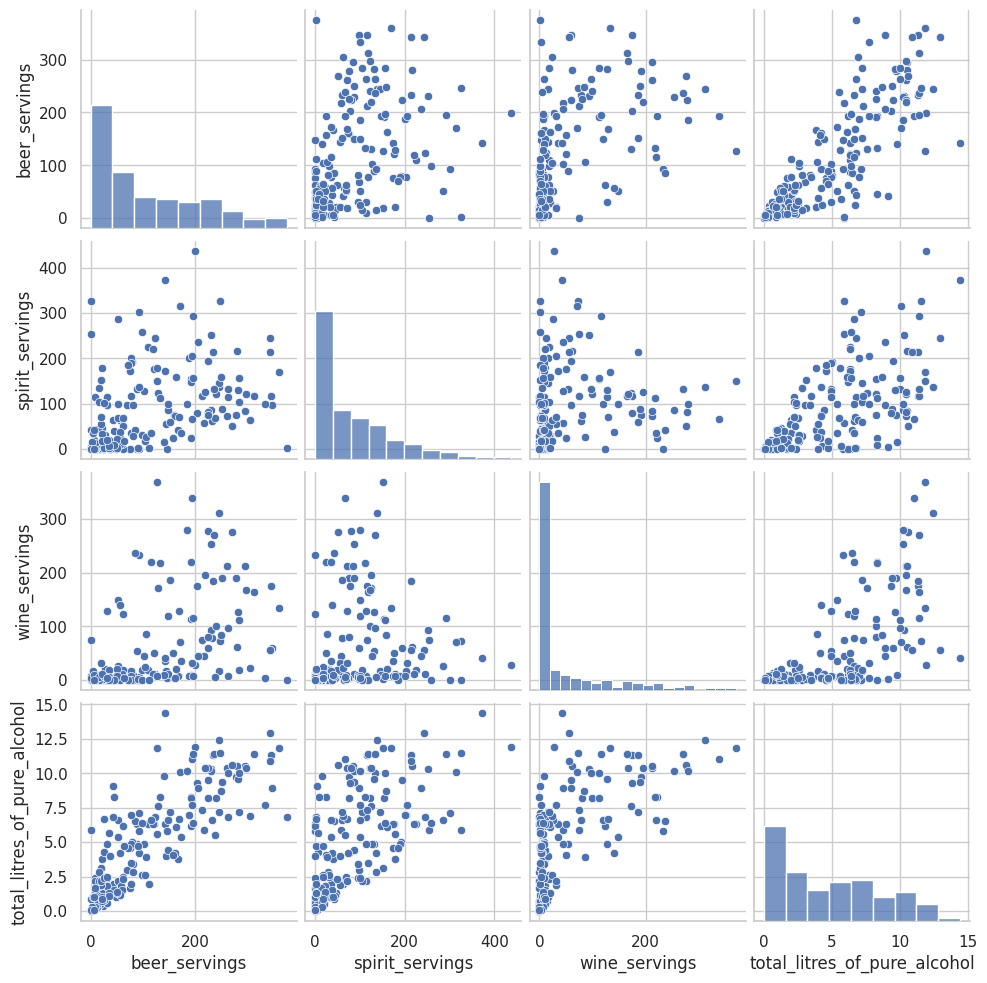

In [ ]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')


plt.show()

-----

# <Step3. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색

### [결측 데이터 전처리]
- continent column에 대한 결측 데이터 처리 과정

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [ ]:
# 결측데이터를 처리합니다 : 기타 대륙으로 통합 -> 'OT'



In [17]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


-----

##### 파이차트 시각화

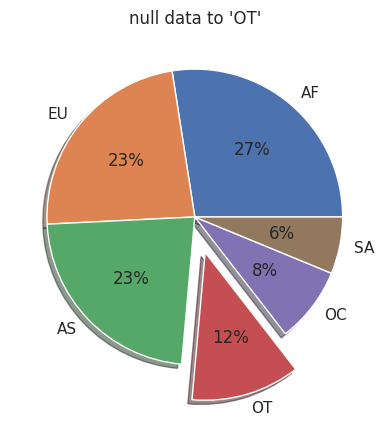

In [19]:
labels = drinks['continent'].value_counts().index #.tolist()
fracs1 = drinks['continent'].value_counts().values #.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

-----

### [그룹 단위의 데이터 분석 : 대륙별 분석]
##### apply, agg 함수를 이용한 대륙별 분석

In [ ]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.




,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [19]:
drinks.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [18]:
drinks = drinks.fillna('OT')

In [20]:
total_alcohol_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_mean[continent_mean>total_alcohol_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.




print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [22]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다.
beer_continent=drinks.groupby('continent')['beer_servings'].mean().idxmax()
beer_continent

'EU'

In [ ]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다.



print(beer_continent)

EU


-----

##### 분석 결과에 대한 시각화

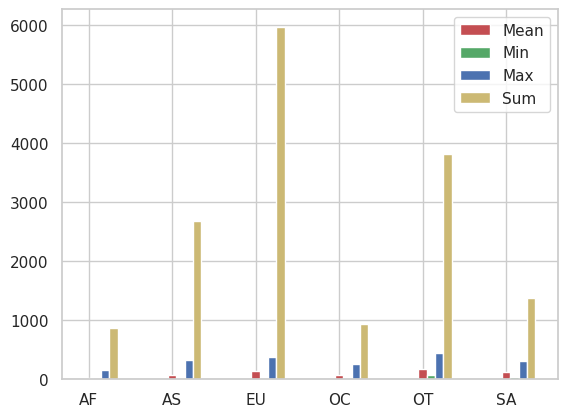

In [25]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

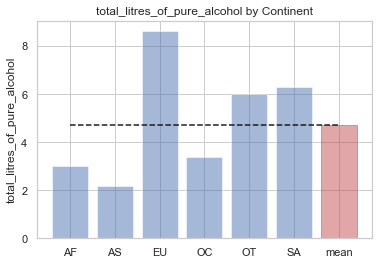

In [21]:
# 대륙별 total_litres_of_pure_alcohol을 시각화합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

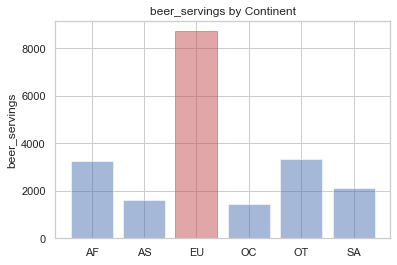

In [22]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
 
plt.show()

-----